# Portfolio Risk and Returns

In [1]:
# x) Remove redundant ticker symbols after dataframe is loaded?
# x) Inferences like vaccine stock spike, boom in AI, EV
# x) Predictions for future or just last 100 days?
# x) Error/Accuracy/Precision Calculation
# x) Combined data from NSE(Indian) and NASDAQ(American) companies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime, timedelta
from dateutil import relativedelta

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
data = pd.read_csv("NASDAQ Symbols.csv")
data.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$1.40,-0.05,-3.448%,4.583600e+07,China,2008.0,12942,Consumer Discretionary,Educational Services
1,AACIW,Armada Acquisition Corp. I Warrant,$0.06,0.00,0.00%,0.000000e+00,United States,2021.0,84274,Finance,Blank Checks
2,AADI,Aadi Bioscience Inc. Common Stock,$8.19,0.06,0.738%,2.001389e+08,United States,NaN,84735,Health Care,Biotechnology: Pharmaceutical Preparations
3,AAL,American Airlines Group Inc. Common Stock,$14.93,0.12,0.81%,9.703035e+09,United States,NaN,15840018,Consumer Discretionary,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$2.15,0.05,2.381%,4.378954e+07,United States,NaN,6947,Finance,Life Insurance


In [4]:
def symbol_search():
    print("---Portfolio Analyis---")
    key1 = "y"
    key2 = ""
    symbols = []
    while key1.lower() == "y":
        search_term = input("Enter the company name:")
        print("Companies found with matching string to", search_term, "are")
        for index, row in data.iterrows():
            string = row[1]
            if not(pd.isna(string)) and search_term.lower() in str(string).lower(): # Checking for NA values
                flag = 1
                print(string)
                key2 = input("Do you want to add this company? (Y/N)")
                if key2.lower() == "y":
                    symbols.append(row[0])
        if flag != 1:
            print("No matching companies were found.")
        key1 = input("Enter N to exit, Y to continue adding companies")
    return symbols   

In [5]:
# input
# Portfolio Stocks
symbols = symbol_search()

---Portfolio Analyis---
Companies found with matching string to microsof are
Microsoft Corporation Common Stock
Companies found with matching string to netflix are
Netflix Inc. Common Stock


In [6]:
# Upload date
flag  = 0
flag2 = 0
while(flag == 0):
    start = input("Enter the date from which analysis should be started(in yyyy-mm-dd format)")
    end = input("Enter the date from which analysis should end (in yyyy-mm-dd format)")
    d1 = datetime.strptime(start, "%Y-%m-%d")
    d2 = datetime.strptime(end, "%Y-%m-%d")
    delta = d2-d1
    if delta < timedelta(days = 100):
        print("Dates should be more than 100 days apart")
        continue
    else:
        flag = 1       

In [7]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,MSFT,NFLX
Date,,
2018-02-02,86.026581,267.429993
2018-02-05,82.483559,254.259995
2018-02-06,85.604790,265.720001
2018-02-07,83.992630,264.559998
2018-02-08,79.680977,250.100006


In [9]:
df.describe()

,MSFT,NFLX
count,1007.000000,1007.000000
mean,174.729566,418.861886
std,72.539992,108.501104
min,79.680977,233.880005
25%,106.755089,331.095001
50%,154.909195,377.869995
75%,226.484650,509.094986
max,338.335938,691.690002


In [10]:
delta = relativedelta.relativedelta(d2,d1)
print("How many years of investing?")
print('%s years' % delta.years)

How many years of investing?
4 years


In [11]:
number_of_years = delta.years

In [12]:
days = (df.index[-1] - df.index[0]).days
days

1460

In [13]:
df.head()

,MSFT,NFLX
Date,,
2018-02-02,86.026581,267.429993
2018-02-05,82.483559,254.259995
2018-02-06,85.604790,265.720001
2018-02-07,83.992630,264.559998
2018-02-08,79.680977,250.100006


In [14]:
df.tail()

,MSFT,NFLX
Date,,
2022-01-26,292.581543,359.700012
2022-01-27,295.667999,386.700012
2022-01-28,303.970856,384.359985
2022-01-31,306.653015,427.140015
2022-02-01,304.463898,457.130005


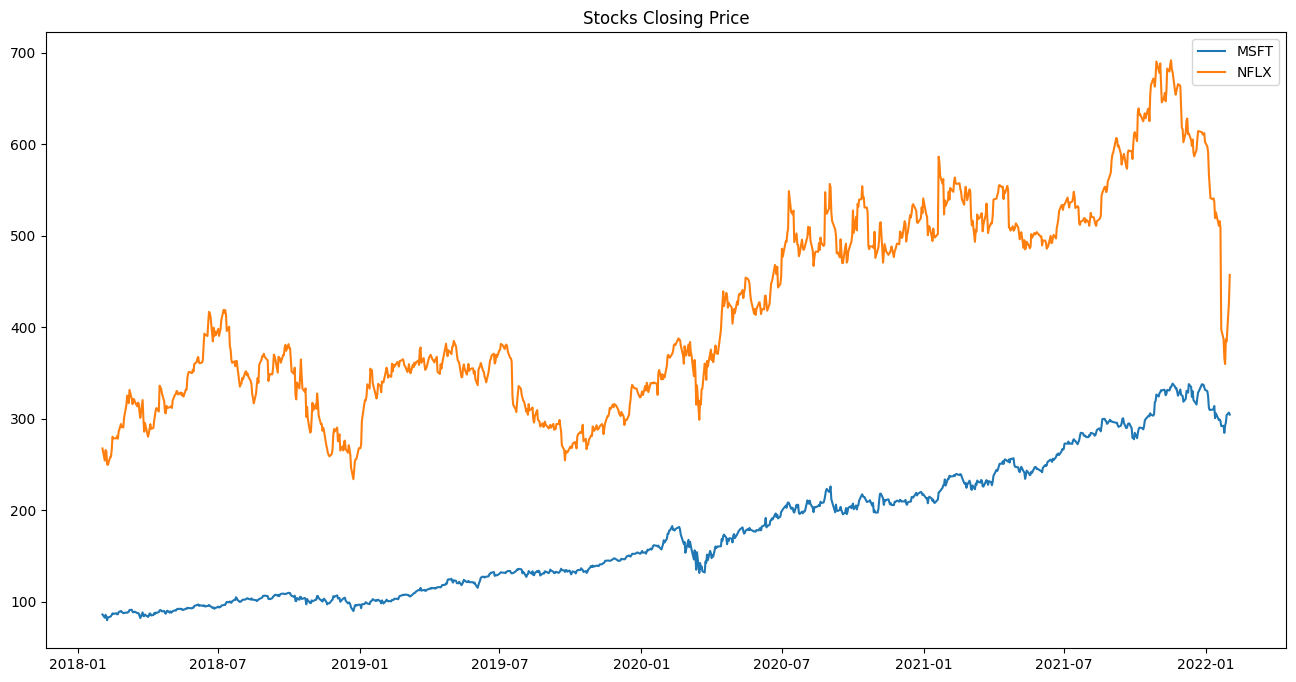

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.title('Stocks Closing Price')
plt.legend(labels=df.columns)

In [16]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

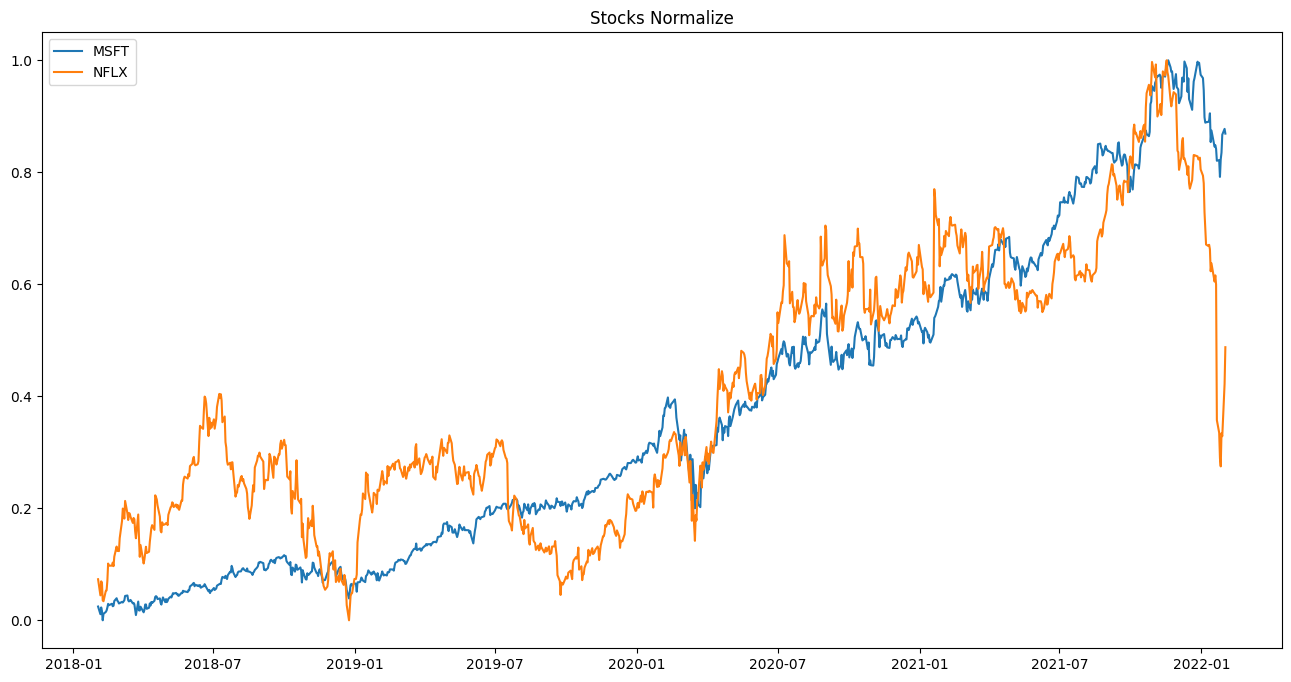

In [17]:
plt.figure(figsize=(16,8))
plt.plot(normalize)
plt.title("Stocks Normalize")
plt.legend(labels=normalize.columns)

In [18]:
stock_rets = df.pct_change().dropna()

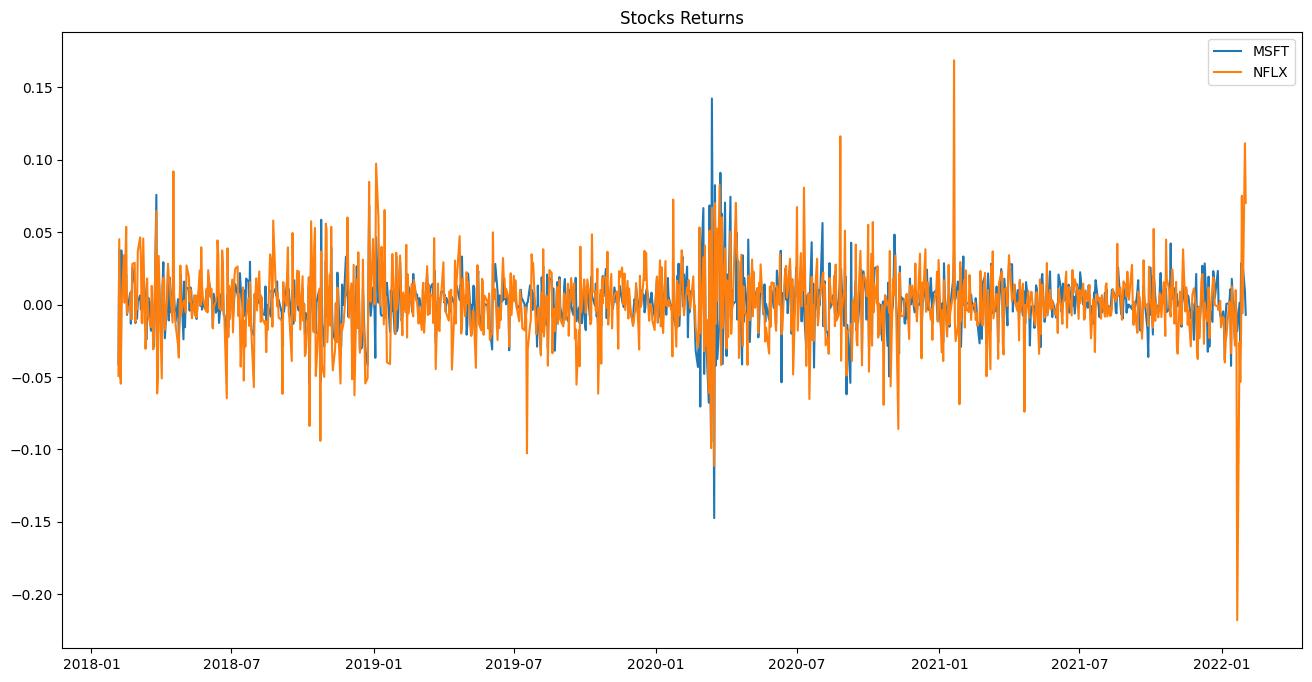

In [19]:
plt.figure(figsize=(16,8))
plt.plot(stock_rets)
plt.title("Stocks Returns")
plt.legend(labels=stock_rets.columns)

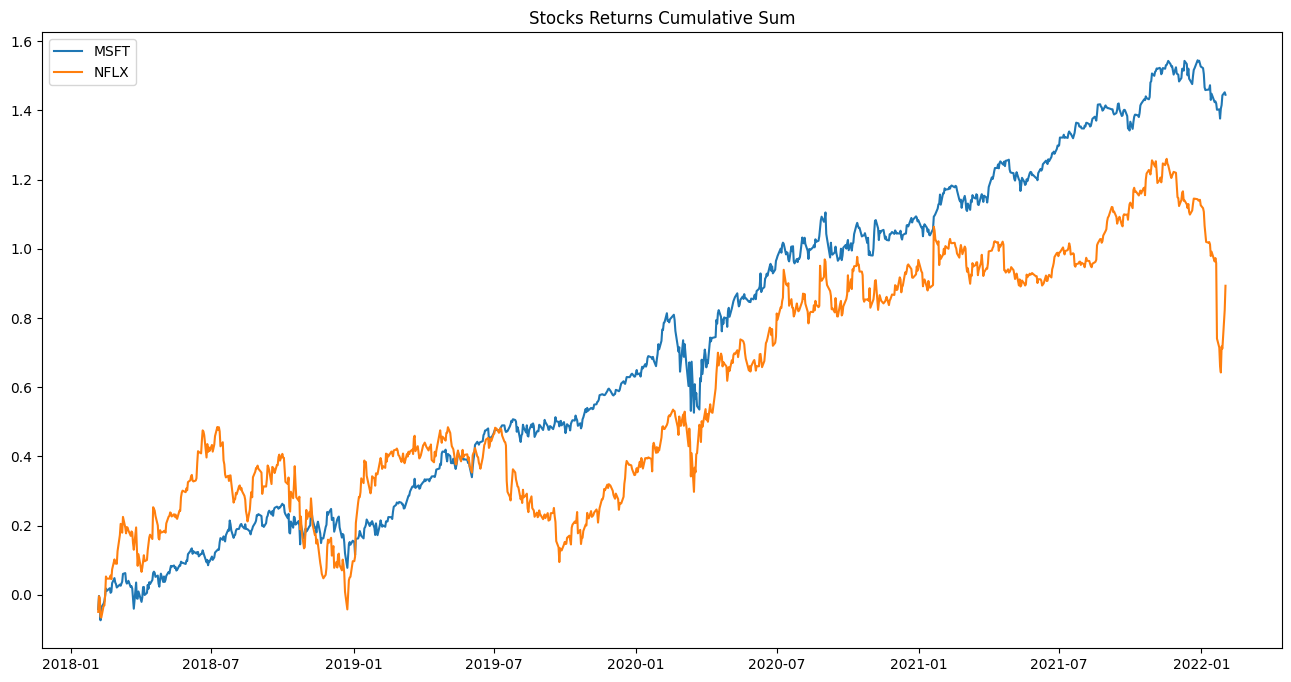

In [20]:
plt.figure(figsize=(16,8))
plt.plot(stock_rets.cumsum())
plt.title("Stocks Returns Cumulative Sum")
plt.legend(labels=stock_rets.columns)

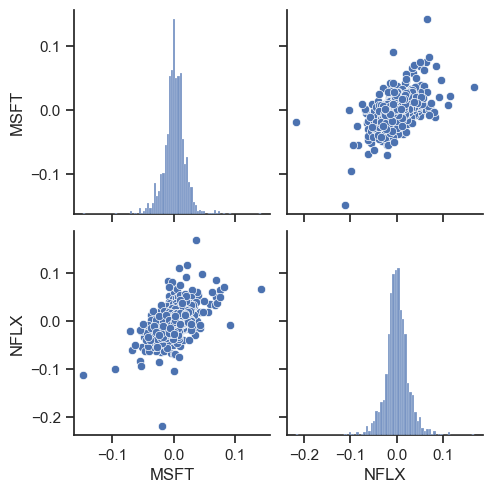

In [21]:
sns.set(style="ticks")
ax = sns.pairplot(stock_rets, diag_kind="hist")

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis="x", nbins=6, tight=True)

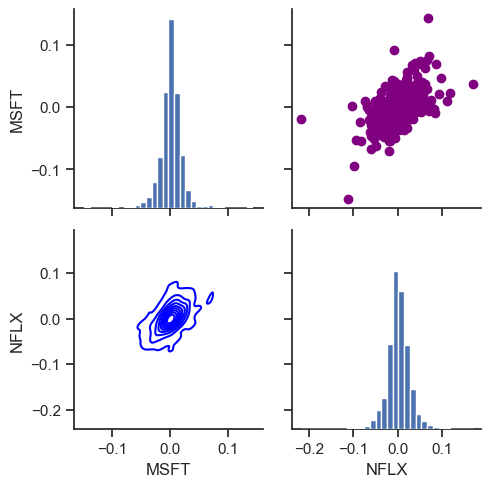

In [22]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color="purple")
ax.map_lower(sns.kdeplot, color="blue")
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis="x", nbins=6, tight=True)

<Axes: >

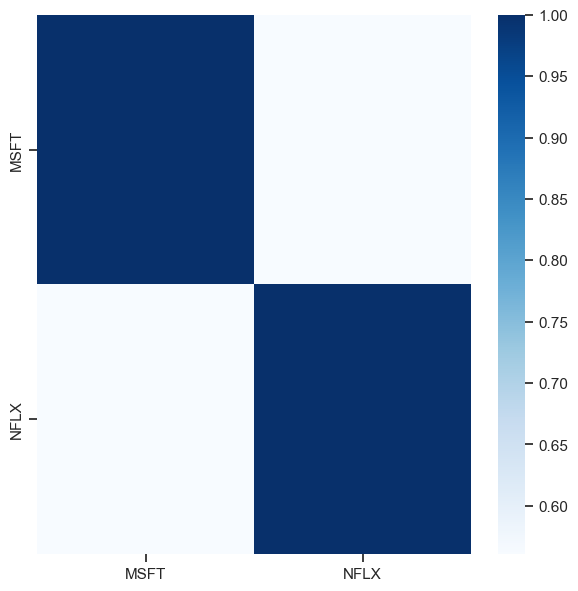

In [23]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

<Axes: >

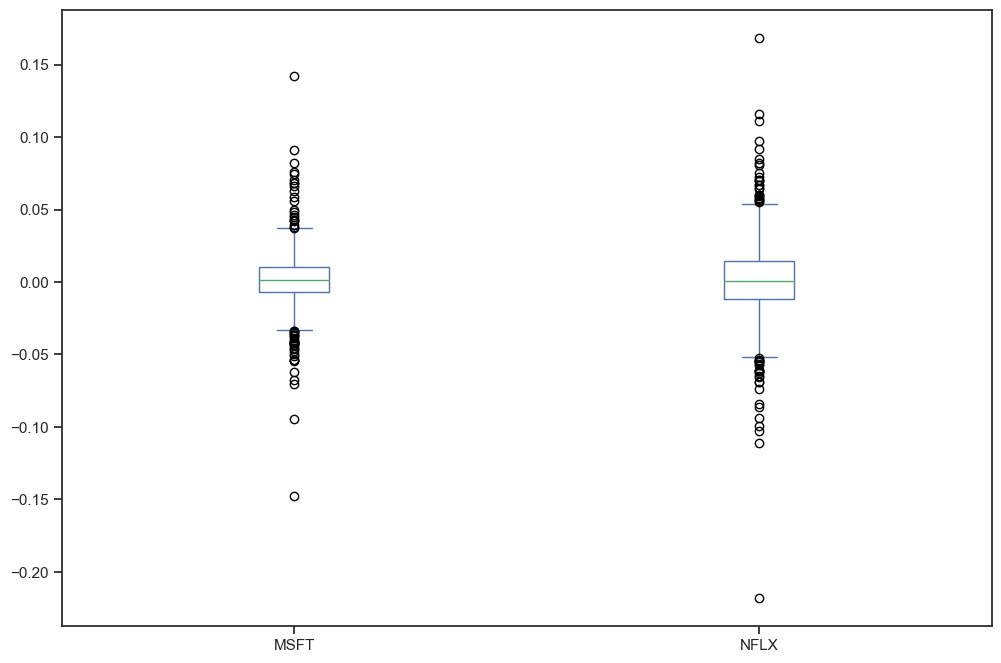

In [24]:
# Box plot
stock_rets.plot(kind="box",figsize=(12,8))

In [29]:
"""

rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title("Stocks Risk & Returns")
plt.xlabel("Expected returns")
plt.ylabel("Risk")
plt.grid(which="major")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = "offset points", ha = "right", va = "bottom",
        arrowprops = dict(arrowstyle = "-", connectionstyle = "arc3,rad=-0.3"))

"""

"\n\nrets = stock_rets.dropna()\n\nplt.figure(figsize=(12,8))\nplt.scatter(rets.mean(), rets.std(),alpha = 0.5)\n\nplt.title('Stocks Risk & Returns')\nplt.xlabel('Expected returns')\nplt.ylabel('Risk')\nplt.grid(which='major')\n\nfor label, x, y in zip(rets.columns, rets.mean(), rets.std()):\n    plt.annotate(\n        label, \n        xy = (x, y), xytext = (50, 50),\n        textcoords = 'offset points', ha = 'right', va = 'bottom',\n        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))\n\n"

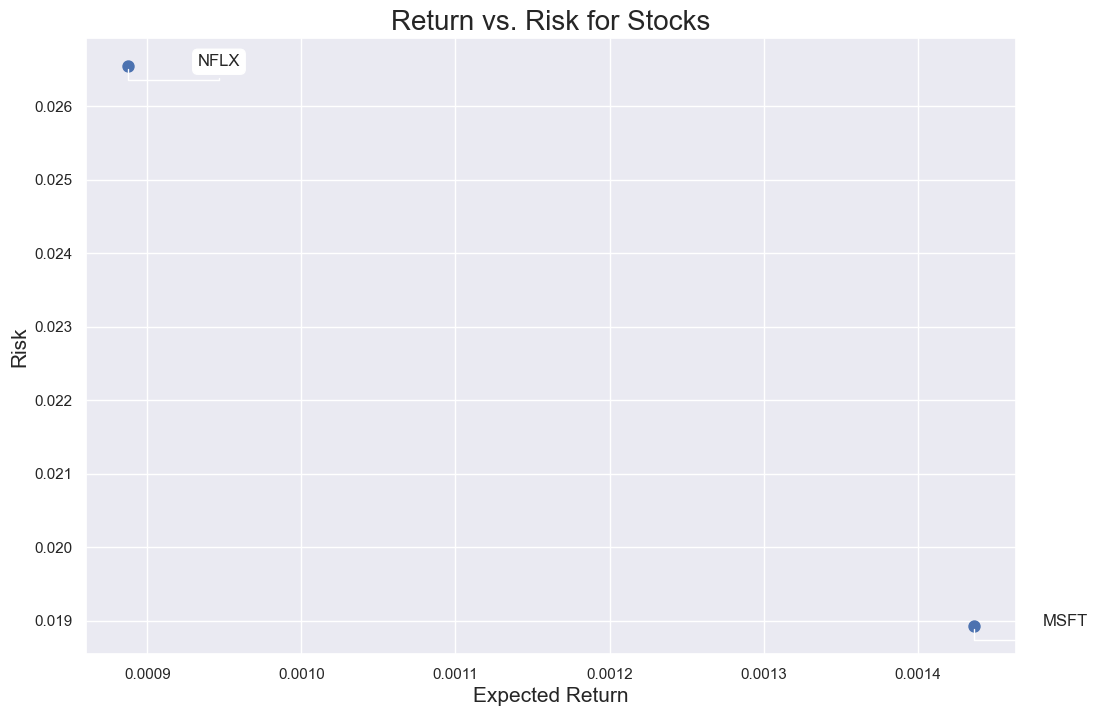

In [30]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords="offset points",
                arrowprops=dict(arrowstyle="-", connectionstyle="bar,angle=180,fraction=-0.2"),
                bbox=dict(boxstyle="round", fc="w"))

In [31]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

MSFT  MSFT    1.0000
NFLX  NFLX    1.0000
MSFT  NFLX    0.5608
NFLX  MSFT    0.5608
dtype: float64

In [32]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,MSFT,NFLX
Date,,
2018-02-05,0.366782,0.436431
2018-02-06,0.639700,0.680497
2018-02-07,0.443977,0.552569
2018-02-08,0.331734,0.422432
2018-02-09,0.637797,0.557347


In [33]:
Normalized_Value.corr()

,MSFT,NFLX
MSFT,1.0000,0.5608
NFLX,0.5608,1.0000


In [34]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

MSFT  MSFT    1.0000
NFLX  NFLX    1.0000
MSFT  NFLX    0.5608
NFLX  MSFT    0.5608
dtype: float64

In [35]:
print("Stock returns: ")
print(rets.mean())
print("-" * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
MSFT    0.001436
NFLX    0.000888
dtype: float64
--------------------------------------------------
Stock risks:
MSFT    0.018924
NFLX    0.026545
dtype: float64


In [36]:
table = pd.DataFrame()
table["Returns"] = rets.mean()
table["Risk"] = rets.std()
table.sort_values(by="Returns")

,Returns,Risk
NFLX,0.000888,0.026545
MSFT,0.001436,0.018924


In [37]:
table.sort_values(by="Risk")

,Returns,Risk
MSFT,0.001436,0.018924
NFLX,0.000888,0.026545


In [38]:
rf = 0.01
table["Sharpe Ratio"] = (table["Returns"] - rf) / table["Risk"]
table

,Returns,Risk,Sharpe Ratio
MSFT,0.001436,0.018924,-0.452544
NFLX,0.000888,0.026545,-0.343283


In [39]:
table["Max Returns"] = rets.max()

In [40]:
table["Min Returns"] = rets.min()

In [41]:
table["Median Returns"] = rets.median()

In [42]:
total_return = stock_rets[-1:].transpose()
table["Total Return"] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
MSFT,0.001436,0.018924,-0.452544,0.142169,-0.147390,0.001569,-0.713874
NFLX,0.000888,0.026545,-0.343283,0.168543,-0.217905,0.000673,7.021115


In [43]:
table["Average Return Yearly"] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
MSFT,0.001436,0.018924,-0.452544,0.142169,-0.147390,0.001569,-0.713874,-0.001789
NFLX,0.000888,0.026545,-0.343283,0.168543,-0.217905,0.000673,7.021115,0.017109


In [44]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table["CAGR"] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
MSFT,0.001436,0.018924,-0.452544,0.142169,-0.147390,0.001569,-0.713874,-0.001789,0.243776
NFLX,0.000888,0.026545,-0.343283,0.168543,-0.217905,0.000673,7.021115,0.017109,0.096950


In [45]:
table.sort_values(by="Average Return Yearly")

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
MSFT,0.001436,0.018924,-0.452544,0.142169,-0.147390,0.001569,-0.713874,-0.001789,0.243776
NFLX,0.000888,0.026545,-0.343283,0.168543,-0.217905,0.000673,7.021115,0.017109,0.096950
